In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import warnings
warnings.filterwarnings('ignore')


In [54]:
pd.set_option("display.max_columns", None)

In [55]:
sns.set_style("whitegrid")

In [56]:
df=pd.read_csv("C:\Study\Programming\PYTHON\Projects\dataset\german_credit_data.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [57]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [58]:
df.shape

(1000, 11)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [60]:
missing_summary = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

missing_info = pd.DataFrame({
    'Missing Values': missing_summary,
    'Percentage (%)': missing_percentage
})

print(missing_info)

                  Missing Values  Percentage (%)
Checking account             394            39.4
Saving accounts              183            18.3
Unnamed: 0                     0             0.0
Sex                            0             0.0
Age                            0             0.0
Housing                        0             0.0
Job                            0             0.0
Credit amount                  0             0.0
Duration                       0             0.0
Purpose                        0             0.0
Risk                           0             0.0


In [61]:
df_mapped=df.fillna("No Account")

In [62]:
df_mapped.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,1000,5,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,1000,4,No Account,394,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df_mapped["Job"].unique()

array([2, 1, 3, 0])

In [64]:
df_mapped.drop(columns="Unnamed: 0", inplace=True)

In [65]:
df=df_mapped

<function matplotlib.pyplot.show(close=None, block=None)>

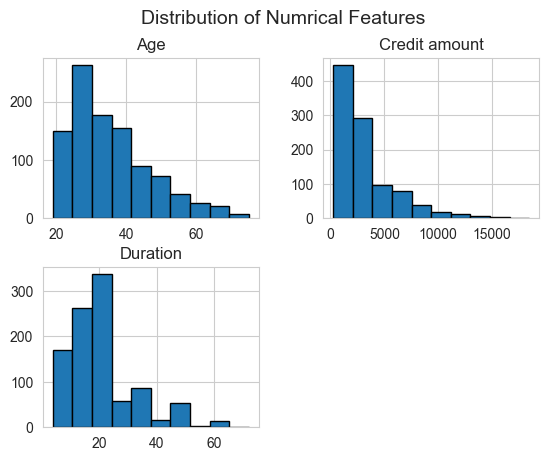

In [66]:
df[["Age","Credit amount", "Duration"]].hist(bins=10, edgecolor="black")
plt.suptitle("Distribution of Numrical Features", fontsize=14)
plt.show

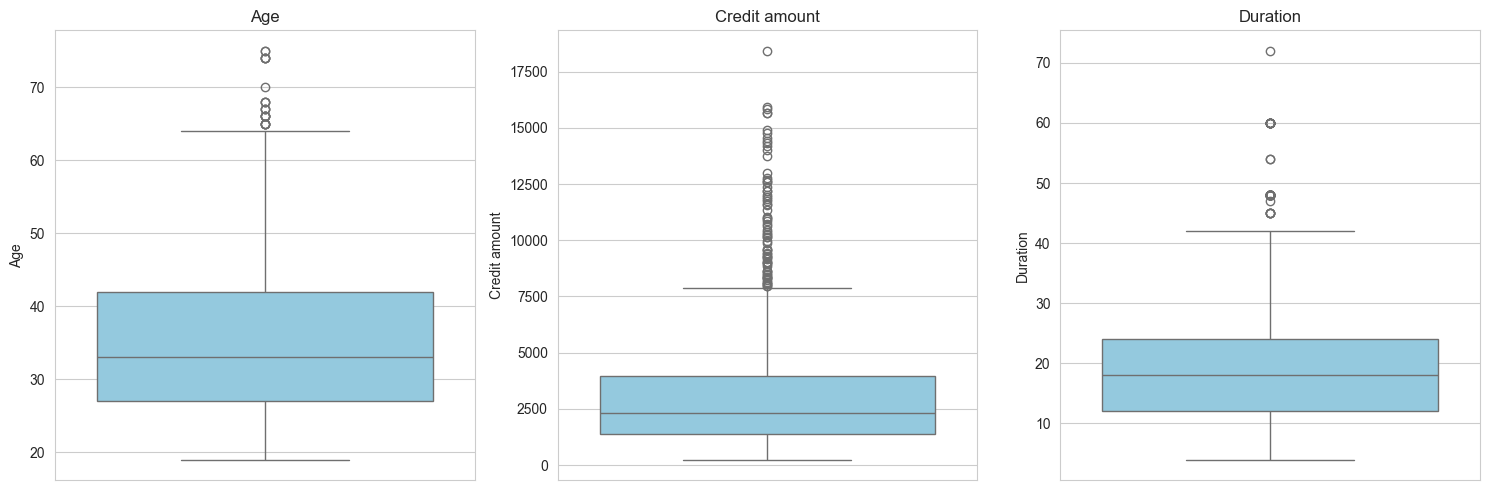

In [67]:
plt.figure(figsize=(15,5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()


In [68]:
df.query("Duration > 70")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
677,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad


In [69]:
categorical_cols= ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]

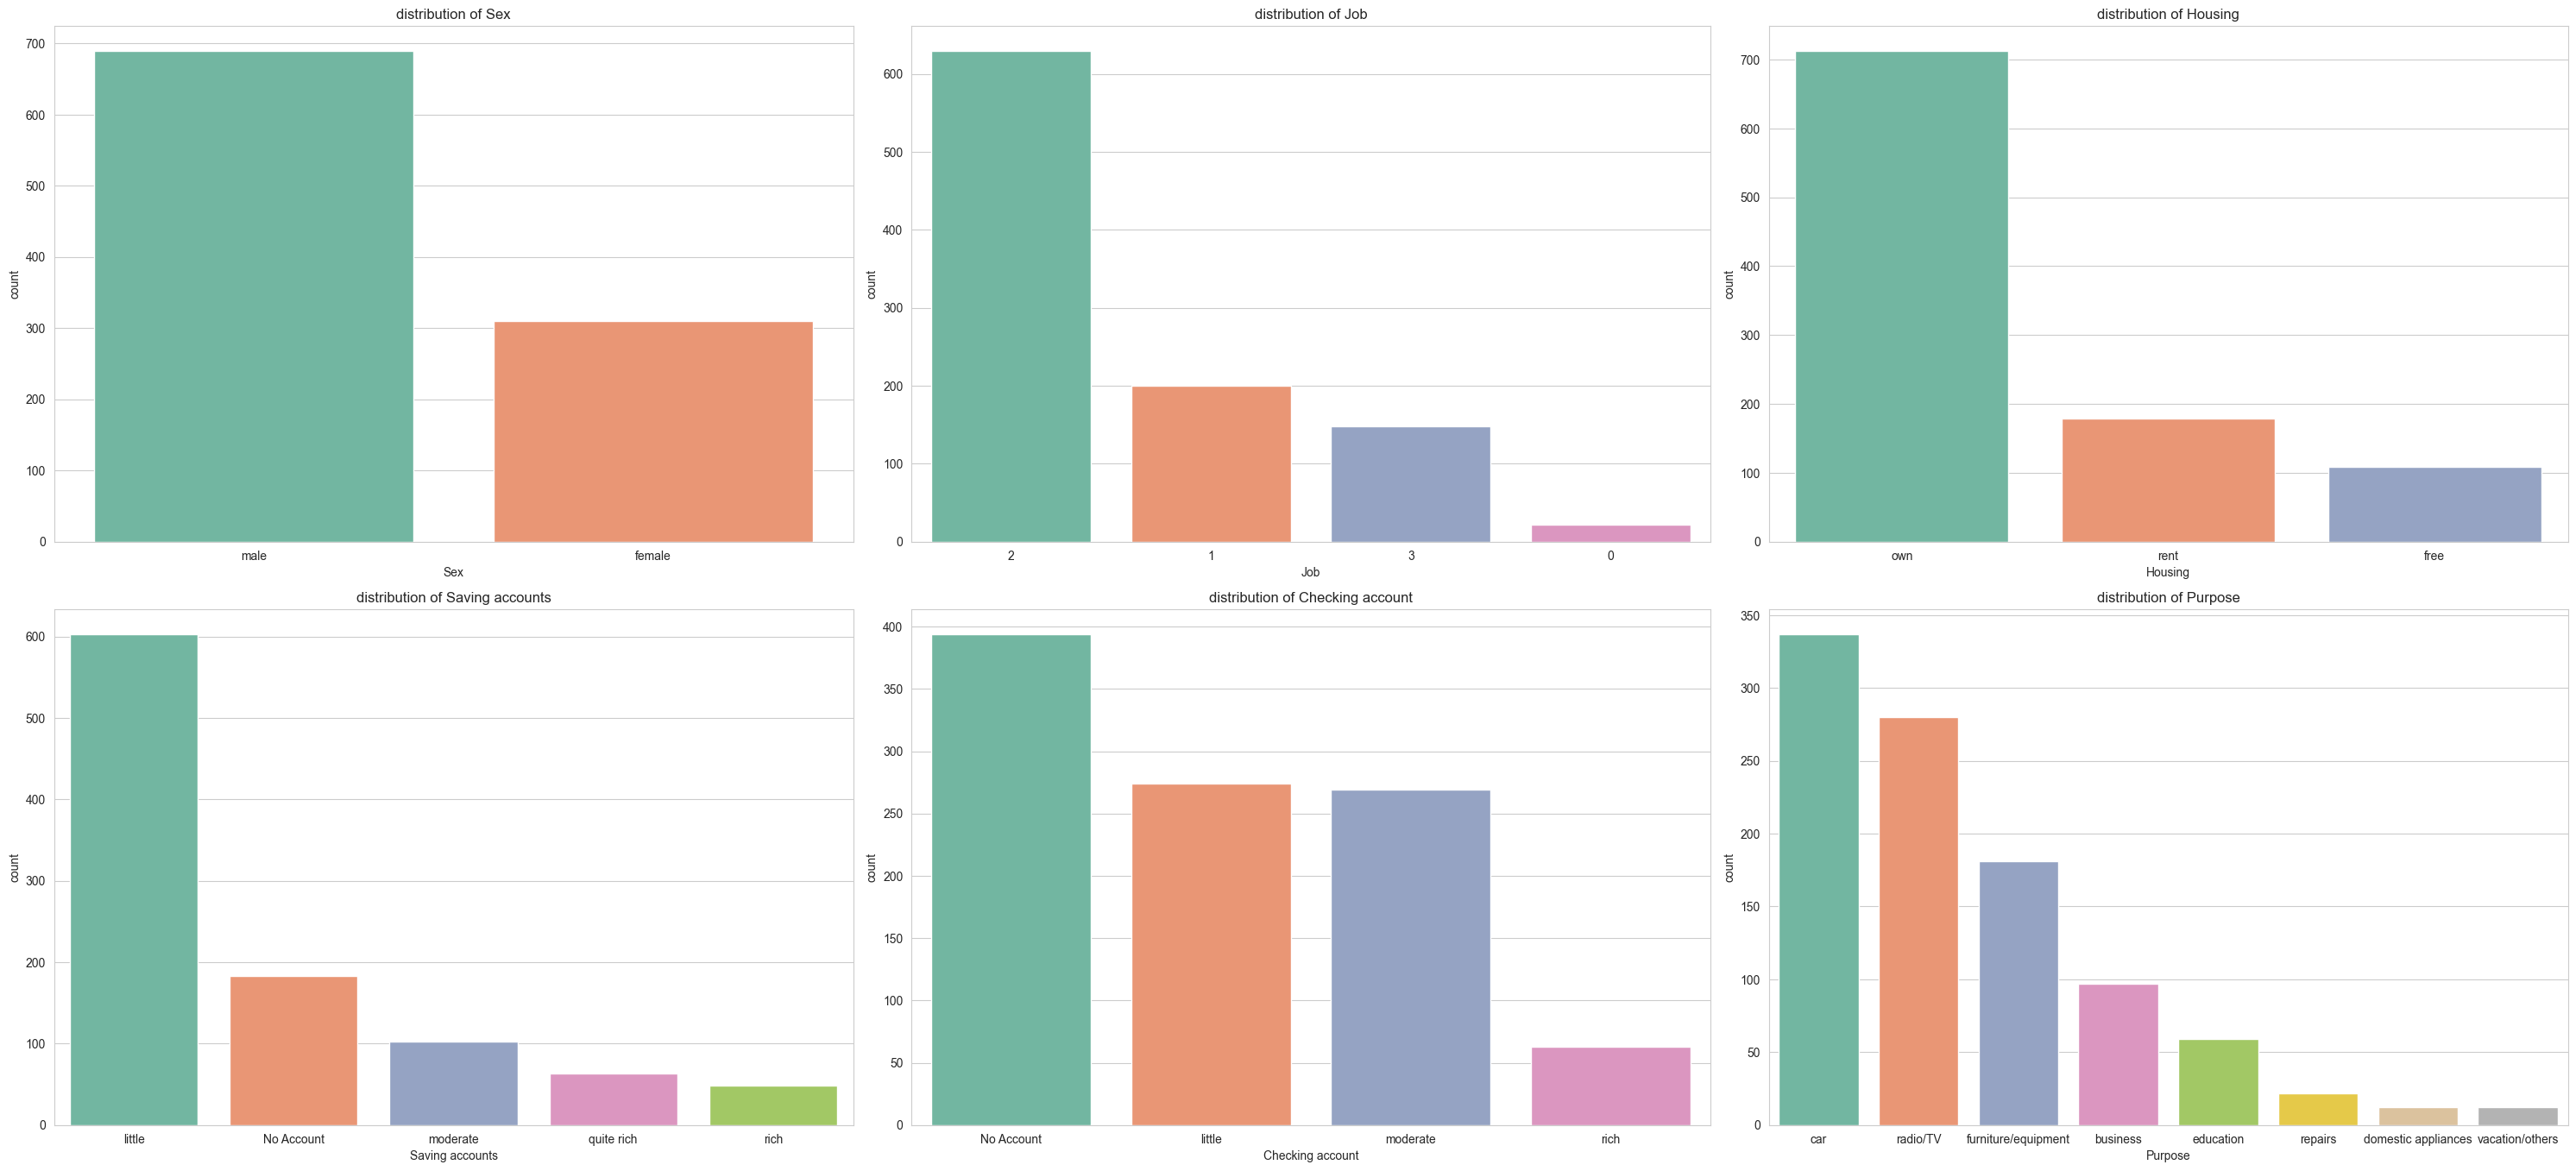

In [70]:
plt.figure(figsize=(30,20))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,palette="Set2", order=df[col].value_counts().index)
    plt.title(f"distribution of {col}")
    plt.xticks()

plt.tight_layout()
plt.show()

In [71]:
corr= df[["Age","Job","Credit amount","Duration"]].corr()
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.015673,0.032716,-0.036136
Job,0.015673,1.000000,0.285385,0.210910
Credit amount,0.032716,0.285385,1.000000,0.624984
Duration,-0.036136,0.210910,0.624984,1.000000


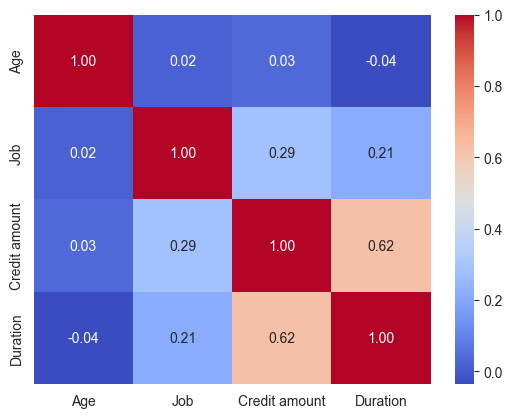

In [72]:
sns.heatmap(corr,annot=True,cmap="coolwarm",fmt=".2f")
plt.show()

In [73]:
df.groupby("Job")["Credit amount"].mean()

Job
0    2745.136364
1    2358.520000
2    3070.965079
3    5435.493243
Name: Credit amount, dtype: float64

In [74]:
df.groupby("Sex")["Credit amount"].mean()

Sex
female    2877.774194
male      3448.040580
Name: Credit amount, dtype: float64

In [75]:
pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4931.800000,5834.181818,NaN,4387.266667,4100.181818,2417.333333,2750.666667,7227.250
own,3800.592105,3329.949772,1546.5,2198.647059,3107.459016,2540.493392,2866.000000,8700.375
rent,5614.125000,3487.968254,1255.5,2931.000000,2727.354167,2199.763158,1522.000000,NaN


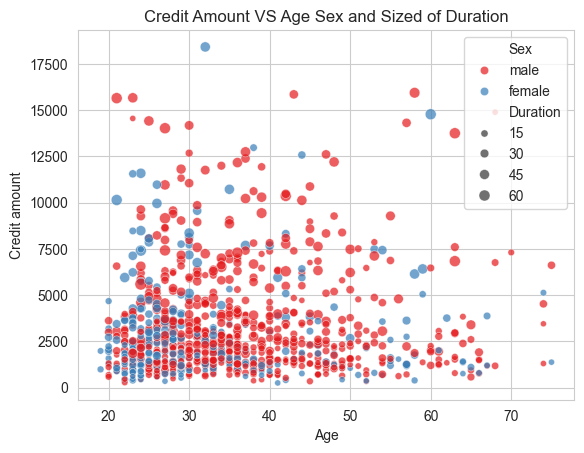

In [76]:
sns.scatterplot(data=df, x="Age", y="Credit amount", hue= "Sex", size="Duration", alpha=0.7,palette="Set1")
plt.title("Credit Amount VS Age Sex and Sized of Duration")
plt.show()

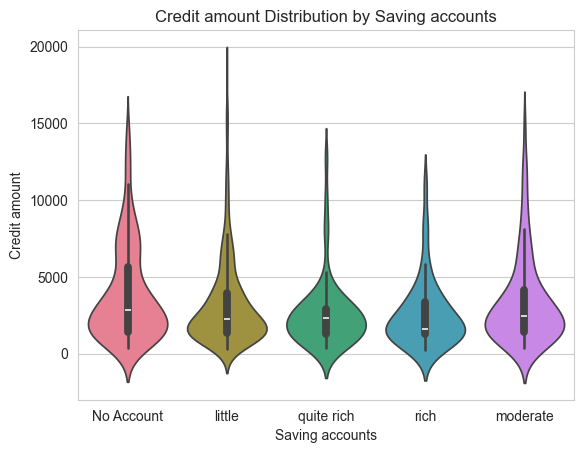

In [77]:
sns.violinplot(data=df, x="Saving accounts", y="Credit amount", palette="husl")
plt.title("Credit amount Distribution by Saving accounts")
plt.show()

In [78]:
df["Risk"].value_counts(normalize=True) *100

Risk
good    70.0
bad     30.0
Name: proportion, dtype: float64

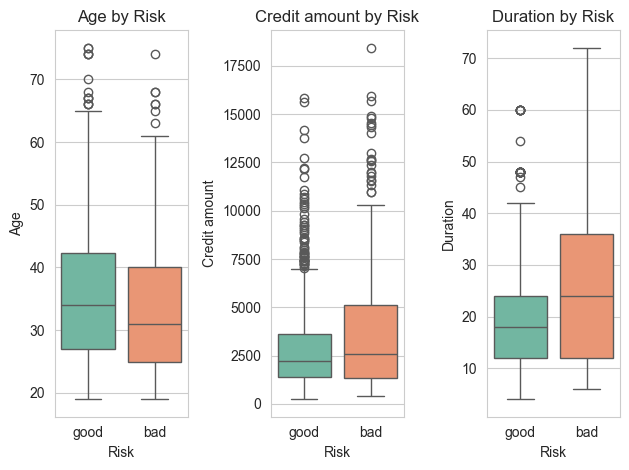

In [79]:
for i,col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(data=df,x="Risk",y=col, palette="Set2")
    plt.title(f"{col} by Risk")


plt.tight_layout()
plt.show()
    
    

In [80]:
df.groupby("Risk")[["Age","Credit amount","Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


In [81]:
condition = (df['Checking account'] == 'No Account') & (df['Saving accounts'] == 'No Account')

count = condition.sum()

print(count)

99


In [83]:
df.drop(df[condition].index, inplace=True)
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,No Account,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,No Account,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,No Account,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,No Account,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


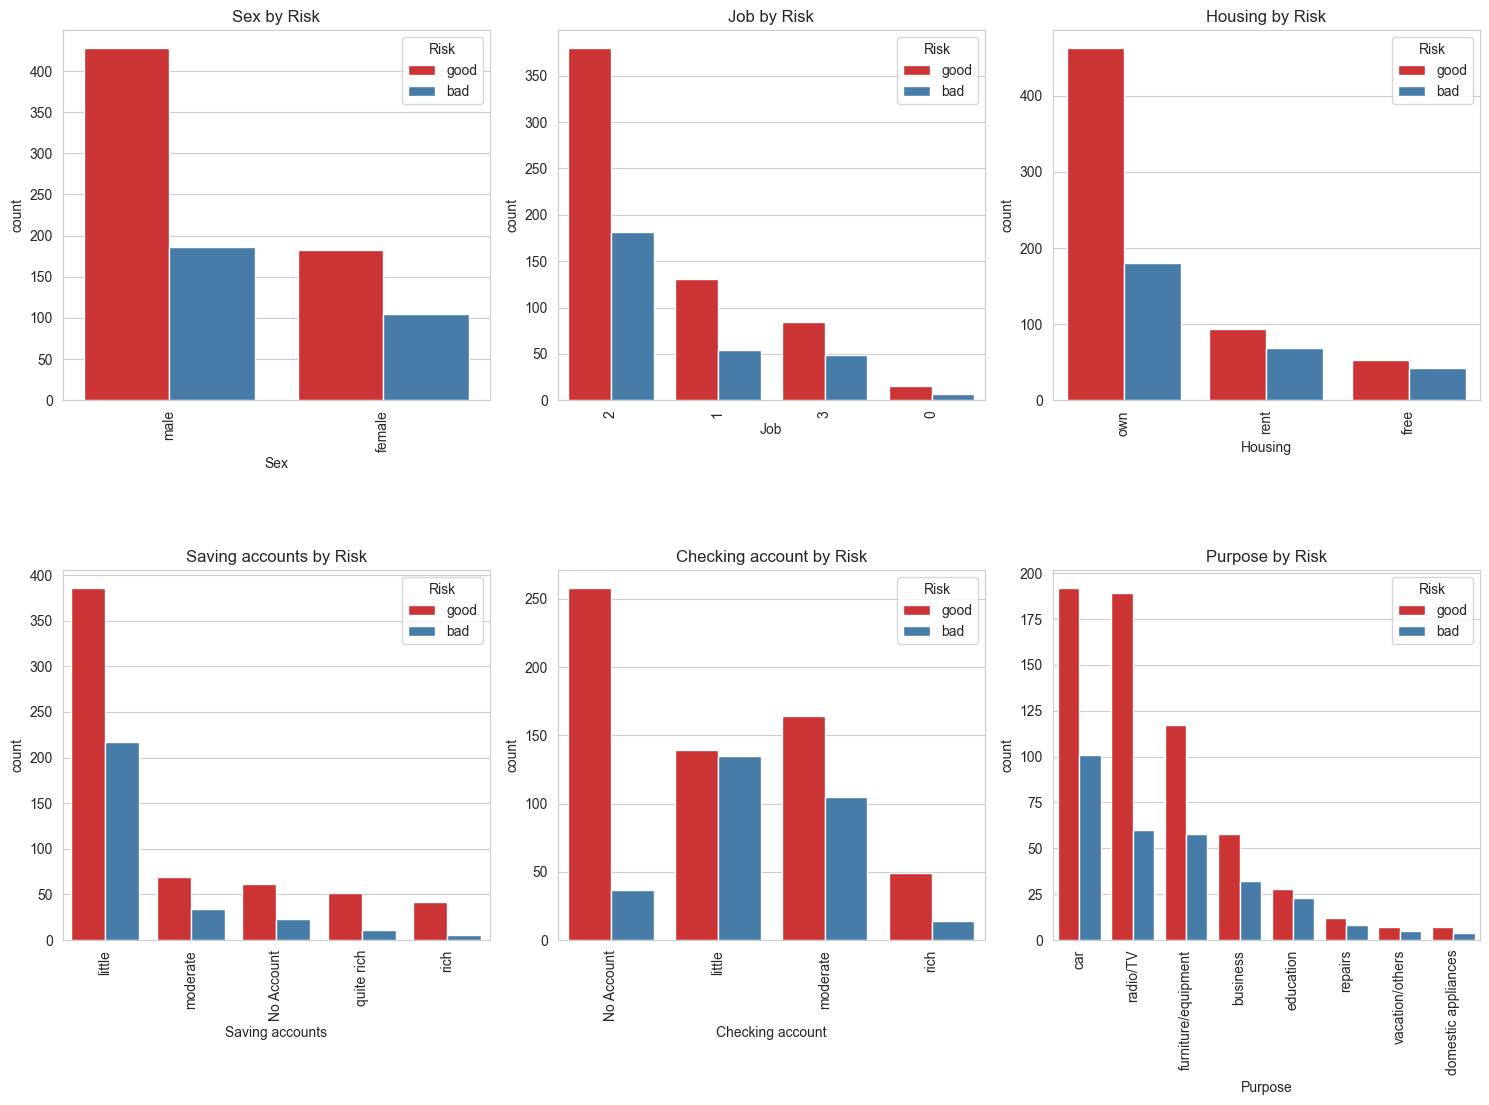

In [84]:
plt.figure(figsize=(15,15))
for i,col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data=df,x=col,hue='Risk',palette='Set1',order=df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [88]:
features= ["Age","Sex","Job","Housing","Saving accounts","Checking account","Credit amount","Duration"]

In [89]:
target="Risk"

In [90]:
df_model=df[features+[target]].copy()

In [91]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,male,2,own,No Account,little,1169,6,good
1,22,female,2,own,little,moderate,5951,48,bad
2,49,male,1,own,little,No Account,2096,12,good
3,45,male,2,free,little,little,7882,42,good
4,53,male,2,free,little,little,4870,24,bad


In [92]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [93]:
cat_cols=df_model.select_dtypes(include=["object"]).columns.drop("Risk")

In [94]:
le_dict={}

In [95]:
cat_cols

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [96]:
for col in cat_cols:
    le=LabelEncoder()
    df_model[col]=le.fit_transform(df_model[col])
    le_dict[col]=le
    joblib.dump(le,f"{col}_encoder.pkl")

In [98]:
le_target=LabelEncoder()

In [99]:
target

'Risk'

In [100]:
df_model[target]=le_target.fit_transform(df_model[target])

In [102]:
df_model[target].value_counts()

Risk
1    610
0    291
Name: count, dtype: int64

In [103]:
joblib.dump(le_target, 'target_encoder.pkl')

['target_encoder.pkl']

In [104]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,67,1,2,1,0,1,1169,6,1
1,22,0,2,1,1,2,5951,48,0
2,49,1,1,1,1,0,2096,12,1
3,45,1,2,0,1,1,7882,42,1
4,53,1,2,0,1,1,4870,24,0


In [105]:
from sklearn.model_selection import train_test_split

In [107]:
X=df_model.drop(target, axis=1)
y=df_model[target]

In [108]:
X

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,67,1,2,1,0,1,1169,6
1,22,0,2,1,1,2,5951,48
2,49,1,1,1,1,0,2096,12
3,45,1,2,0,1,1,7882,42
4,53,1,2,0,1,1,4870,24
...,...,...,...,...,...,...,...,...
995,31,0,1,1,1,0,1736,12
996,40,1,3,1,1,1,3857,30
997,38,1,2,1,1,0,804,12
998,23,1,2,0,1,1,1845,45


In [109]:
y

0      1
1      0
2      1
3      1
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Risk, Length: 901, dtype: int64

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)
X_train.shape

(720, 8)

In [113]:
X_test.shape

(181, 8)

In [115]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [116]:
def train_model(model,param_grid,X_train,y_train,X_test,y_test):
    grid= GridSearchCV(model,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
    grid.fit(X_train,y_train)
    best_model=grid.best_estimator_
    y_pred=best_model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    return best_model,accuracy,grid.best_params_

In [117]:
dt=DecisionTreeClassifier(random_state=42,class_weight="balanced")
dt_param_grid={
    "max_depth": [3,5,7,10,None],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [119]:
best_dt,acc_dt,param_dt=train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [120]:
print("Decision Tree Accuracy",acc_dt)

Decision Tree Accuracy 0.6574585635359116


In [121]:
print("Best parameters",param_dt)

Best parameters {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [122]:
rf=RandomForestClassifier(random_state=42,class_weight="balanced",n_jobs=-1)

In [126]:
rf_param_grid={
    "n_estimators":[100],
    "max_depth":[None,10,20,30,40,50],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [130]:
best_rf,acc_rf,params_rf=train_model(rf, rf_param_grid, X_train, y_train, X_test, y_test)

In [140]:
print("Random Forest Accuracy",acc_rf)

Random Forest Accuracy 0.7292817679558011


In [133]:
print("Best Parameters", params_rf)

Best Parameters {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [134]:
et=ExtraTreesClassifier(random_state=1,class_weight="balanced",n_jobs=-1)

In [138]:
et_param_grid={
    "n_estimators":[100],
    "max_depth":[None,10,20,30,40,50],
    "min_samples_split":[2,5,10],
    "min_samples_leaf":[1,2,4]
}

In [142]:
best_et,acc_et,params_et=train_model(et, et_param_grid, X_train, y_train, X_test, y_test)

In [143]:
print("Extra Tree Accuracy",acc_et)

Extra Tree Accuracy 0.6519337016574586


In [144]:
print("Best Parameters", params_et)

Best Parameters {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [145]:
xgb=XGBClassifier(random_state=42,scale_pos_weight=(y_train==0).sum()/(y_train==1).sum(),use_label_encoder=False,eval_metric='logloss')

In [146]:
xgb_param_grid={
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

In [147]:
best_xgb,acc_xgb,params_xgb=train_model(xgb, xgb_param_grid, X_train, y_train, X_test, y_test)

In [148]:
print("XGBoost Accuracy",acc_xgb)

XGBoost Accuracy 0.7182320441988951


In [149]:
best_rf.predict(X_test)

array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1])

In [150]:
joblib.dump(best_rf,"best_rf_credit_risk_modeling.pkl")

['best_rf_credit_risk_modeling.pkl']